In [ ]:
pip install pyedflib

In [ ]:
pip install scipy

In [ ]:
from pyedflib import highlevel
import pandas as pd
import numpy as np
from glob import glob
from scipy.signal import butter, filtfilt
from scipy import signal
import seaborn as sns

In [ ]:
data_list = glob('*.edf')

In [ ]:
trains = [x for x in data_list if x.endswith('.edf')]

In [ ]:
data_list

['NU0012.edf']

# NU0001

In [ ]:
highlevel.read_edf(trains[0])

(array([[   0. ,    0. ,    0. , ..., 1085. , 1085. , 1085. ],
        [   0. ,    7.8,   15.6, ...,  406. ,  413.8,  421.6],
        [   0. ,    0. ,    0. , ..., 1085. , 1085. , 1085. ],
        ...,
        [   0. ,    0. ,    0. , ...,    4. ,    4. ,    4. ],
        [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ],
        [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ]]),
 [{'label': 'TIME_STAMP_s',
   'dimension': 'uV',
   'sample_rate': 128.0,
   'sample_frequency': 128.0,
   'physical_max': 16000.0,
   'physical_min': 0.0,
   'digital_max': 16000,
   'digital_min': 0,
   'prefilter': '',
   'transducer': 'emotiv electrode'},
  {'label': 'TIME_STAMP_ms',
   'dimension': 'uV',
   'sample_rate': 128.0,
   'sample_frequency': 128.0,
   'physical_max': 999.0,
   'physical_min': 0.0,
   'digital_max': 9990,
   'digital_min': 0,
   'prefilter': '',
   'transducer': 'emotiv electrode'},
  {'label': 'OR_TIME_STAMP_s',
   'dimension': 'uV',
   'sample_rate': 128.0,
   'sampl

In [ ]:
highlevel.read_edf(trains[0])[0]

array([[   0. ,    0. ,    0. , ..., 1085. , 1085. , 1085. ],
       [   0. ,    7.8,   15.6, ...,  406. ,  413.8,  421.6],
       [   0. ,    0. ,    0. , ..., 1085. , 1085. , 1085. ],
       ...,
       [   0. ,    0. ,    0. , ...,    4. ,    4. ,    4. ],
       [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ],
       [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ]])

In [ ]:
highlevel.read_edf(trains[0])[1]

[{'label': 'TIME_STAMP_s',
  'dimension': 'uV',
  'sample_rate': 128.0,
  'sample_frequency': 128.0,
  'physical_max': 16000.0,
  'physical_min': 0.0,
  'digital_max': 16000,
  'digital_min': 0,
  'prefilter': '',
  'transducer': 'emotiv electrode'},
 {'label': 'TIME_STAMP_ms',
  'dimension': 'uV',
  'sample_rate': 128.0,
  'sample_frequency': 128.0,
  'physical_max': 999.0,
  'physical_min': 0.0,
  'digital_max': 9990,
  'digital_min': 0,
  'prefilter': '',
  'transducer': 'emotiv electrode'},
 {'label': 'OR_TIME_STAMP_s',
  'dimension': 'uV',
  'sample_rate': 128.0,
  'sample_frequency': 128.0,
  'physical_max': 16000.0,
  'physical_min': 0.0,
  'digital_max': 16000,
  'digital_min': 0,
  'prefilter': '',
  'transducer': 'emotiv electrode'},
 {'label': 'OR_TIME_STAMP_ms',
  'dimension': 'uV',
  'sample_rate': 128.0,
  'sample_frequency': 128.0,
  'physical_max': 16000.0,
  'physical_min': 0.0,
  'digital_max': 16000,
  'digital_min': 0,
  'prefilter': '',
  'transducer': 'emotiv elec

In [ ]:
df = pd.DataFrame(highlevel.read_edf(trains[0])[0]).T
df.columns = ['TIME_STAMP_s', 'TIME_STAMP_ms', 'OR_TIME_STAMP_s', 'OR_TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED',
              'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'BATTERY',
              'BATTERY_PERCENT', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_AF3', 'CQ_F7', 'CQ_F3',
              'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_Overall',
              'EQ_SampleRateQua', 'EQ_OVERALL', 'EQ_AF3', 'EQ_F7', 'EQ_F3', 'EQ_FC5', 'EQ_T7', 'EQ_P7', 'EQ_O1', 'EQ_O2', 'EQ_P8',
              'EQ_T8', 'EQ_FC6', 'EQ_F4', 'EQ_F8', 'EQ_AF4', 'CQ_CMS', 'CQ_DRL']

In [ ]:
df = pd.DataFrame(highlevel.read_edf(trains[0])[0][6:20]).T
df.columns = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [ ]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4249.743590,4212.820513,4278.461538,4269.230769,4252.307692,4235.384615,4220.000000,4224.615385,4206.666667,4083.076923,4430.769231,4444.615385,4321.025641,4351.794872
1,4237.948718,4203.589744,4268.205128,4265.128205,4253.333333,4235.897436,4206.153846,4215.897436,4195.897436,4074.871795,4422.564103,4428.205128,4307.692308,4336.410256
2,4226.666667,4189.743590,4258.461538,4253.333333,4251.282051,4233.846154,4194.358974,4201.025641,4182.051282,4070.256410,4423.076923,4412.820513,4289.743590,4320.512821
3,4213.333333,4192.820513,4260.000000,4245.128205,4253.846154,4234.358974,4197.948718,4203.076923,4188.205128,4073.846154,4423.076923,4411.282051,4296.923077,4324.615385
4,4211.282051,4208.717949,4270.256410,4255.384615,4253.333333,4237.948718,4204.102564,4216.923077,4202.051282,4079.487179,4419.487179,4418.974359,4313.846154,4336.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139003,4101.025641,4117.948718,4122.051282,4021.538462,4067.692308,4044.102564,4122.051282,4111.282051,4104.615385,4089.230769,4293.846154,4300.512821,4203.076923,4267.179487
139004,4111.794872,4115.897436,4125.641026,4018.461538,4066.666667,4033.846154,4120.000000,4106.666667,4104.615385,4090.256410,4301.538462,4297.948718,4210.769231,4264.102564
139005,4126.666667,4123.589744,4135.897436,4023.589744,4070.769231,4036.410256,4125.641026,4113.846154,4117.948718,4093.846154,4313.333333,4309.743590,4217.948718,4274.358974
139006,4129.230769,4134.358974,4145.128205,4029.230769,4077.948718,4046.666667,4132.307692,4121.538462,4118.974359,4094.871795,4322.564103,4320.512821,4217.948718,4291.282051


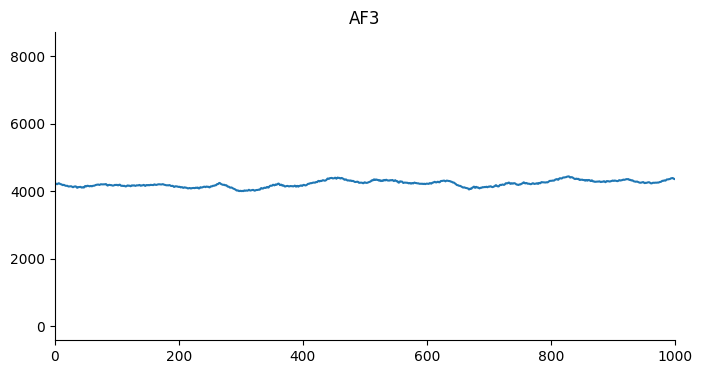

In [ ]:
from matplotlib import pyplot as plt
df['AF3'].plot(kind='line', figsize=(8, 4), title='AF3')

plt.xlim(0, 1000)

plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4'],
      dtype='object')

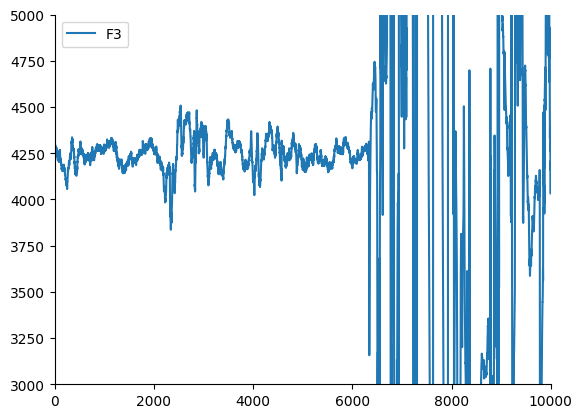

In [ ]:
# Assuming df is your DataFrame
#df['AF3'].plot(kind='line', figsize=(14, 8), title='NU0001', label='AF3')
#df['AF4'].plot(kind='line', label='AF4')
#df['F7'].plot(kind='line', label='F7')
df['F3'].plot(kind='line', label='F3')
#df['F4'].plot(kind='line', label='F4')
#df['F8'].plot(kind='line', label='F8')
#df['FC5'].plot(kind='line', label='FC5')
#df['FC6'].plot(kind='line', label='FC6')
#df['T7'].plot(kind='line', label='T7')
#df['T8'].plot(kind='line', label='T8')
#df['P7'].plot(kind='line', label='P7')
#df['P8'].plot(kind='line', label='P8')
#df['O1'].plot(kind='line', label='O1')
#df['O2'].plot(kind='line', label='O2')


plt.xlim(0, 10000)
plt.ylim(3000, 5000)
# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend()

# Show the plot
plt.show()


In [ ]:
df_filtered = df.copy()

In [ ]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4249.743590,4212.820513,4278.461538,4269.230769,4252.307692,4235.384615,4220.000000,4224.615385,4206.666667,4083.076923,4430.769231,4444.615385,4321.025641,4351.794872
1,4237.948718,4203.589744,4268.205128,4265.128205,4253.333333,4235.897436,4206.153846,4215.897436,4195.897436,4074.871795,4422.564103,4428.205128,4307.692308,4336.410256
2,4226.666667,4189.743590,4258.461538,4253.333333,4251.282051,4233.846154,4194.358974,4201.025641,4182.051282,4070.256410,4423.076923,4412.820513,4289.743590,4320.512821
3,4213.333333,4192.820513,4260.000000,4245.128205,4253.846154,4234.358974,4197.948718,4203.076923,4188.205128,4073.846154,4423.076923,4411.282051,4296.923077,4324.615385
4,4211.282051,4208.717949,4270.256410,4255.384615,4253.333333,4237.948718,4204.102564,4216.923077,4202.051282,4079.487179,4419.487179,4418.974359,4313.846154,4336.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139003,4101.025641,4117.948718,4122.051282,4021.538462,4067.692308,4044.102564,4122.051282,4111.282051,4104.615385,4089.230769,4293.846154,4300.512821,4203.076923,4267.179487
139004,4111.794872,4115.897436,4125.641026,4018.461538,4066.666667,4033.846154,4120.000000,4106.666667,4104.615385,4090.256410,4301.538462,4297.948718,4210.769231,4264.102564
139005,4126.666667,4123.589744,4135.897436,4023.589744,4070.769231,4036.410256,4125.641026,4113.846154,4117.948718,4093.846154,4313.333333,4309.743590,4217.948718,4274.358974
139006,4129.230769,4134.358974,4145.128205,4029.230769,4077.948718,4046.666667,4132.307692,4121.538462,4118.974359,4094.871795,4322.564103,4320.512821,4217.948718,4291.282051


In [ ]:
df_filtered

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,-2.249109,27.539527,40.195961,13.098034,2.861493,5.376468,5.644191,8.936425,15.374037,8.240855,12.528413,3.584393,18.279937,5.521748
1,-13.031367,14.345542,28.124674,5.192206,3.007054,3.954055,-10.281940,-5.159447,-0.041183,-0.813169,6.849127,-15.053551,-0.579027,-13.195026
2,-26.939617,7.315146,21.632874,-2.577132,3.407359,4.801888,-17.529612,-11.236217,-5.483609,-4.055209,3.674621,-26.396618,-8.365775,-22.890594
3,-37.948580,9.826240,23.296211,-5.763110,3.270567,7.031078,-15.555865,-8.061012,-0.131463,-1.052130,3.207947,-27.703943,-3.122540,-20.709024
4,-36.494758,19.790757,31.171992,-1.785538,2.172509,6.382796,-11.715655,-3.350168,6.630341,3.477833,4.248515,-22.858902,6.167898,-11.925001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139003,-69.454027,-47.663575,-57.321517,-80.634819,-40.632555,-42.861087,-23.990558,-26.559771,-24.123163,-17.896353,-79.115127,-45.237026,-32.793050,-52.984416
139004,-55.884727,-44.117031,-52.181428,-75.607457,-39.532602,-44.977193,-24.761462,-28.079034,-20.638335,-16.587560,-72.168647,-44.401966,-27.979290,-42.841791
139005,-42.617776,-38.012257,-42.187852,-70.410295,-32.978466,-43.807495,-21.257781,-23.654952,-13.558709,-14.168700,-60.715208,-35.996915,-22.160693,-33.477428
139006,-39.827817,-31.492659,-34.886836,-67.015850,-29.276533,-40.289057,-16.521505,-18.948238,-11.437146,-12.042792,-51.527133,-27.440524,-19.001800,-29.134264


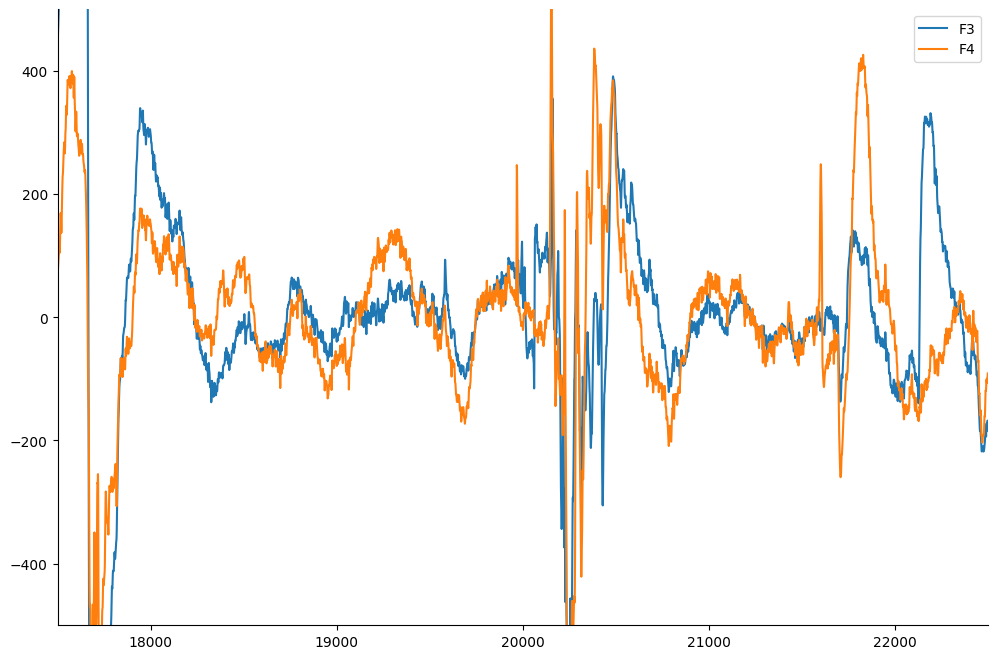

In [ ]:
lowcut = 0.1
highcut = 30

fs = 128

# Design the bandpass filter
b, a = butter(N=4, Wn=[lowcut, highcut], btype='band', fs=fs)

# Apply the bandpass filter to each column in the DataFrame

for column in df.columns:
    df_filtered[column] = filtfilt(b, a, df[column])


plt.figure(figsize=(12, 8))

#df_filtered.plot(kind='line', title='Filtered EEG Data')
#df_filtered['AF3'].plot(kind='line', figsize=(14, 8), title='NU0001', label='AF3')
#df_filtered['AF4'].plot(kind='line', label='AF4')
#df_filtered['F7'].plot(kind='line', label='F7')  # Add another line
df_filtered['F3'].plot(kind='line', label='F3')
df_filtered['F4'].plot(kind='line', label='F4')
#df_filtered['F8'].plot(kind='line', label='F8')
#df_filtered['FC5'].plot(kind='line', label='FC5')
#df_filtered['FC6'].plot(kind='line', label='FC6')
#df_filtered['T7'].plot(kind='line', label='T7')
#df_filtered['T8'].plot(kind='line', label='T8')
#df_filtered['P7'].plot(kind='line', label='P7')
#df_filtered['P8'].plot(kind='line', label='P8')
#df_filtered['O1'].plot(kind='line', label='O1')
#df_filtered['O2'].plot(kind='line', label='O2')


plt.xlim(17500, 22500)
plt.ylim(-500, 500)
# Remove top and right spines

plt.gca().spines[['top', 'right']].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
df

,AF3,AF4,F7,F3,F4,F8,FC5,FC6,T7,T8,P7,P8,O1,O2
0,4243.589744,4259.487179,4266.666667,4227.179487,4278.974359,4255.897436,3951.282051,4261.538462,4200.000000,4228.717949,4426.153846,4432.307692,4292.820513,4350.256410
1,4240.512821,4243.076923,4257.435897,4213.333333,4264.102564,4253.333333,3940.000000,4242.564103,4187.692308,4212.307692,4415.897436,4416.410256,4271.794872,4348.717949
2,4246.153846,4255.384615,4264.102564,4214.871795,4264.102564,4252.307692,3958.461538,4256.410256,4200.000000,4223.076923,4426.153846,4420.512821,4280.512821,4353.333333
3,4253.846154,4271.794872,4272.820513,4237.435897,4271.282051,4251.794872,3980.000000,4273.846154,4218.461538,4248.717949,4451.794872,4438.461538,4306.153846,4358.461538
4,4245.641026,4265.641026,4268.717949,4235.384615,4266.666667,4252.820513,3978.974359,4267.692308,4219.487179,4246.666667,4452.820513,4436.923077,4308.717949,4355.897436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133883,4129.743590,4177.435897,4168.717949,4226.666667,4148.205128,4168.717949,3897.948718,4126.153846,4105.641026,4092.307692,4297.435897,4305.128205,4134.358974,4241.538462
133884,4128.205128,4164.102564,4171.282051,4226.666667,4151.794872,4165.128205,3888.717949,4133.333333,4105.641026,4094.358974,4306.153846,4312.307692,4137.948718,4247.692308
133885,4126.153846,4152.307692,4169.230769,4211.794872,4154.871795,4166.153846,3876.410256,4126.153846,4105.641026,4105.641026,4318.974359,4308.205128,4133.333333,4248.717949
133886,4134.358974,4175.384615,4171.282051,4220.512821,4150.256410,4161.025641,3864.102564,4130.769231,4112.307692,4108.205128,4326.153846,4313.846154,4140.512821,4256.923077


In [ ]:
df_filtered

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,-2.249109,27.539527,40.195961,13.098034,2.861493,5.376468,5.644191,8.936425,15.374037,8.240855,12.528413,3.584393,18.279937,5.521748
1,-13.031367,14.345542,28.124674,5.192206,3.007054,3.954055,-10.281940,-5.159447,-0.041183,-0.813169,6.849127,-15.053551,-0.579027,-13.195026
2,-26.939617,7.315146,21.632874,-2.577132,3.407359,4.801888,-17.529612,-11.236217,-5.483609,-4.055209,3.674621,-26.396618,-8.365775,-22.890594
3,-37.948580,9.826240,23.296211,-5.763110,3.270567,7.031078,-15.555865,-8.061012,-0.131463,-1.052130,3.207947,-27.703943,-3.122540,-20.709024
4,-36.494758,19.790757,31.171992,-1.785538,2.172509,6.382796,-11.715655,-3.350168,6.630341,3.477833,4.248515,-22.858902,6.167898,-11.925001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139003,-69.454027,-47.663575,-57.321517,-80.634819,-40.632555,-42.861087,-23.990558,-26.559771,-24.123163,-17.896353,-79.115127,-45.237026,-32.793050,-52.984416
139004,-55.884727,-44.117031,-52.181428,-75.607457,-39.532602,-44.977193,-24.761462,-28.079034,-20.638335,-16.587560,-72.168647,-44.401966,-27.979290,-42.841791
139005,-42.617776,-38.012257,-42.187852,-70.410295,-32.978466,-43.807495,-21.257781,-23.654952,-13.558709,-14.168700,-60.715208,-35.996915,-22.160693,-33.477428
139006,-39.827817,-31.492659,-34.886836,-67.015850,-29.276533,-40.289057,-16.521505,-18.948238,-11.437146,-12.042792,-51.527133,-27.440524,-19.001800,-29.134264


In [ ]:
df_filtered['F3'][17500:22500]

17500    429.696633
17501    449.237684
17502    458.880056
17503    464.116469
17504    472.637572
            ...    
22495   -172.474100
22496   -181.545711
22497   -184.296364
22498   -175.626940
22499   -167.801421
Name: F3, Length: 5000, dtype: float64

# Density

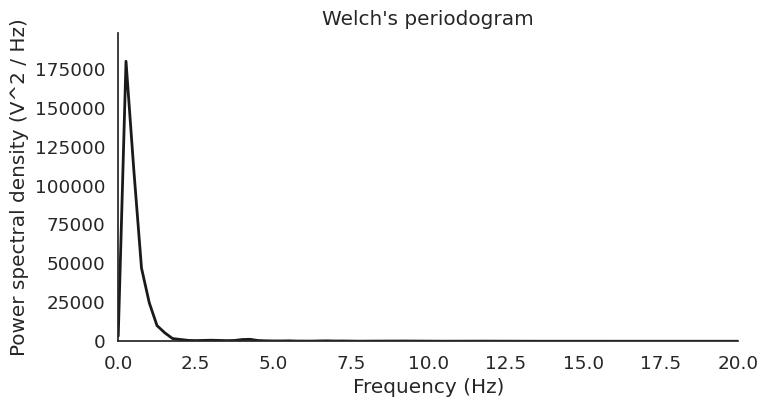

In [ ]:
win = 4 * fs
freqs, psd = signal.welch(df_filtered['AF3'][17500:22500], fs, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
#plt.xlim([0, freqs.max()])
plt.xlim([0, 20])
sns.despine()

Delta power

In [ ]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

NameError: name 'np' is not defined

In [ ]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 4444.274 uV^2


In [ ]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.220


Theta power

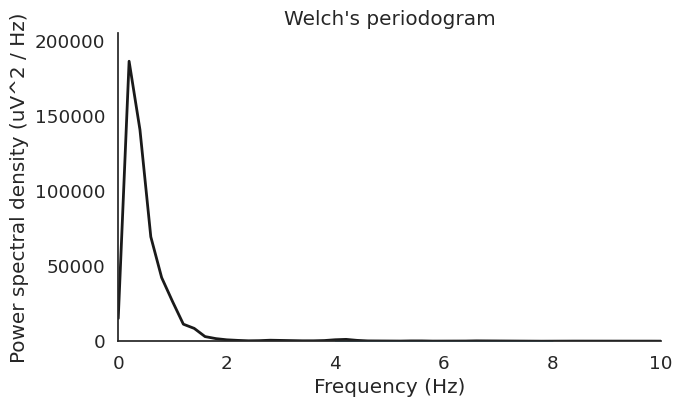

In [ ]:
# Define Theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the theta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_theta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
theta_power = simps(psd[idx_theta], dx=freq_res)
print('Absolute theta power: %.3f uV^2' % theta_power)

Absolute theta power: 1005.949 uV^2


In [ ]:
# Relative theta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
theta_rel_power = theta_power / total_power
print('Relative theta power: %.3f' % theta_rel_power)

Relative theta power: 0.009


Alpha power

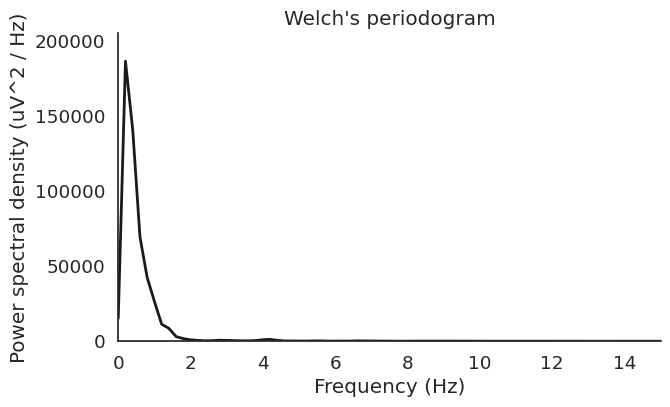

In [ ]:
# Define Alpha lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the alpha area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_alpha, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 15])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
alpha_power = simps(psd[idx_alpha], dx=freq_res)
print('Absolute alpha power: %.3f uV^2' % alpha_power)

Absolute alpha power: 22.216 uV^2


In [ ]:
# Relative alpha power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
alpha_rel_power = alpha_power / total_power
print('Relative alpha power: %.3f' % alpha_rel_power)

Relative alpha power: 0.001


Beta power

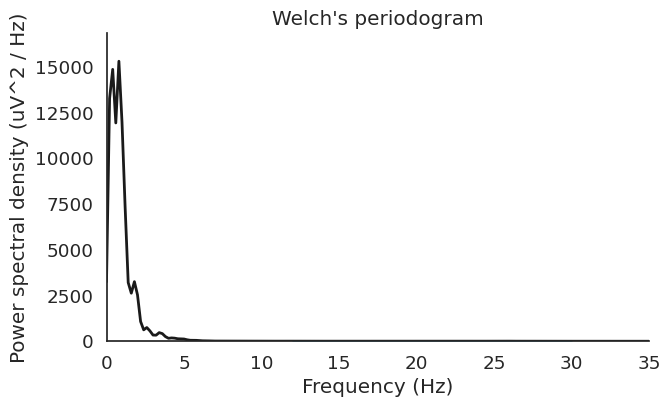

In [ ]:
# Define Beta lower and upper limits
low, high = 12, 30

# Find intersecting values in frequency vector
idx_beta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the beta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_beta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 35])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
beta_power = simps(psd[idx_beta], dx=freq_res)
print('Absolute beta power: %.3f uV^2' % beta_power)

Absolute beta power: 63.577 uV^2


In [ ]:
# Relative beta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
beta_rel_power = beta_power / total_power
print('Relative beta power: %.3f' % beta_rel_power)

Relative beta power: 0.003


Ratio calculation

In [ ]:
def bandpower(data, fs, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * fs
    else:
        nperseg = (2 / low) * fs

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, fs, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp


In [ ]:
# Define the duration of the window to be 4 seconds

purpose = df_filtered['F3'][17500:22500]
win_sec = 5

# Delta/beta ratio based on the absolute power
db = bandpower(purpose, fs, [0.5, 4], win_sec) / bandpower(purpose, fs, [12, 30], win_sec)

# Delta/beta ratio based on the relative power
db_rel = bandpower(purpose, fs, [0.5, 4], win_sec, True) / bandpower(purpose, fs, [12, 30], win_sec, True)

print('Delta/beta ratio (absolute): %.3f' % db)
print('Delta/beta ratio (relative): %.3f' % db_rel)


# Theta/Beta ratio based on the absolute power
tb = bandpower(purpose, fs, [4, 8], win_sec) / bandpower(purpose, fs, [12, 30], win_sec)

# Theta/Beta ratio based on the relative power
tb_rel = bandpower(purpose, fs, [4, 8], win_sec, True) / bandpower(purpose, fs, [12, 30], win_sec, True)

print('Theta/Beta ratio (absolute): %.3f' % tb)
print('Theta/Beta ratio (relative): %.3f' % tb_rel)

# Theta/Alpha ratio based on the absolute power
ta = bandpower(purpose, fs, [4, 8], win_sec) / bandpower(purpose, fs, [8, 12], win_sec)

# Theta/Alpha ratio based on the relative power
ta_rel = bandpower(purpose, fs, [4, 8], win_sec, True) / bandpower(purpose, fs, [8, 12], win_sec, True)

print('Theta/Alpha ratio (absolute): %.3f' % ta)
print('Theta/Alpha ratio (relative): %.3f' % ta_rel)

Delta/beta ratio (absolute): 54.447
Delta/beta ratio (relative): 54.447
Theta/Beta ratio (absolute): 2.619
Theta/Beta ratio (relative): 2.619
Theta/Alpha ratio (absolute): 5.800
Theta/Alpha ratio (relative): 5.800


# 다른 코드

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
path = "/content/NU0001_EPOCX_191346_2023.08.16T11.49.53+09.00.md.edf"
signals, signal_headers, header = highlevel.read_edf(path)

In [ ]:
print(signals[0])

[   0.    0.    0. ... 1217. 1217. 1217.]


In [ ]:
header

{'technician': '',
 'recording_additional': '',
 'patientname': '',
 'patient_additional': '',
 'patientcode': '',
 'equipment': '',
 'admincode': '',
 'sex': '',
 'startdate': datetime.datetime(2023, 8, 16, 11, 49, 53),
 'birthdate': '',
 'gender': '',
 'annotations': []}

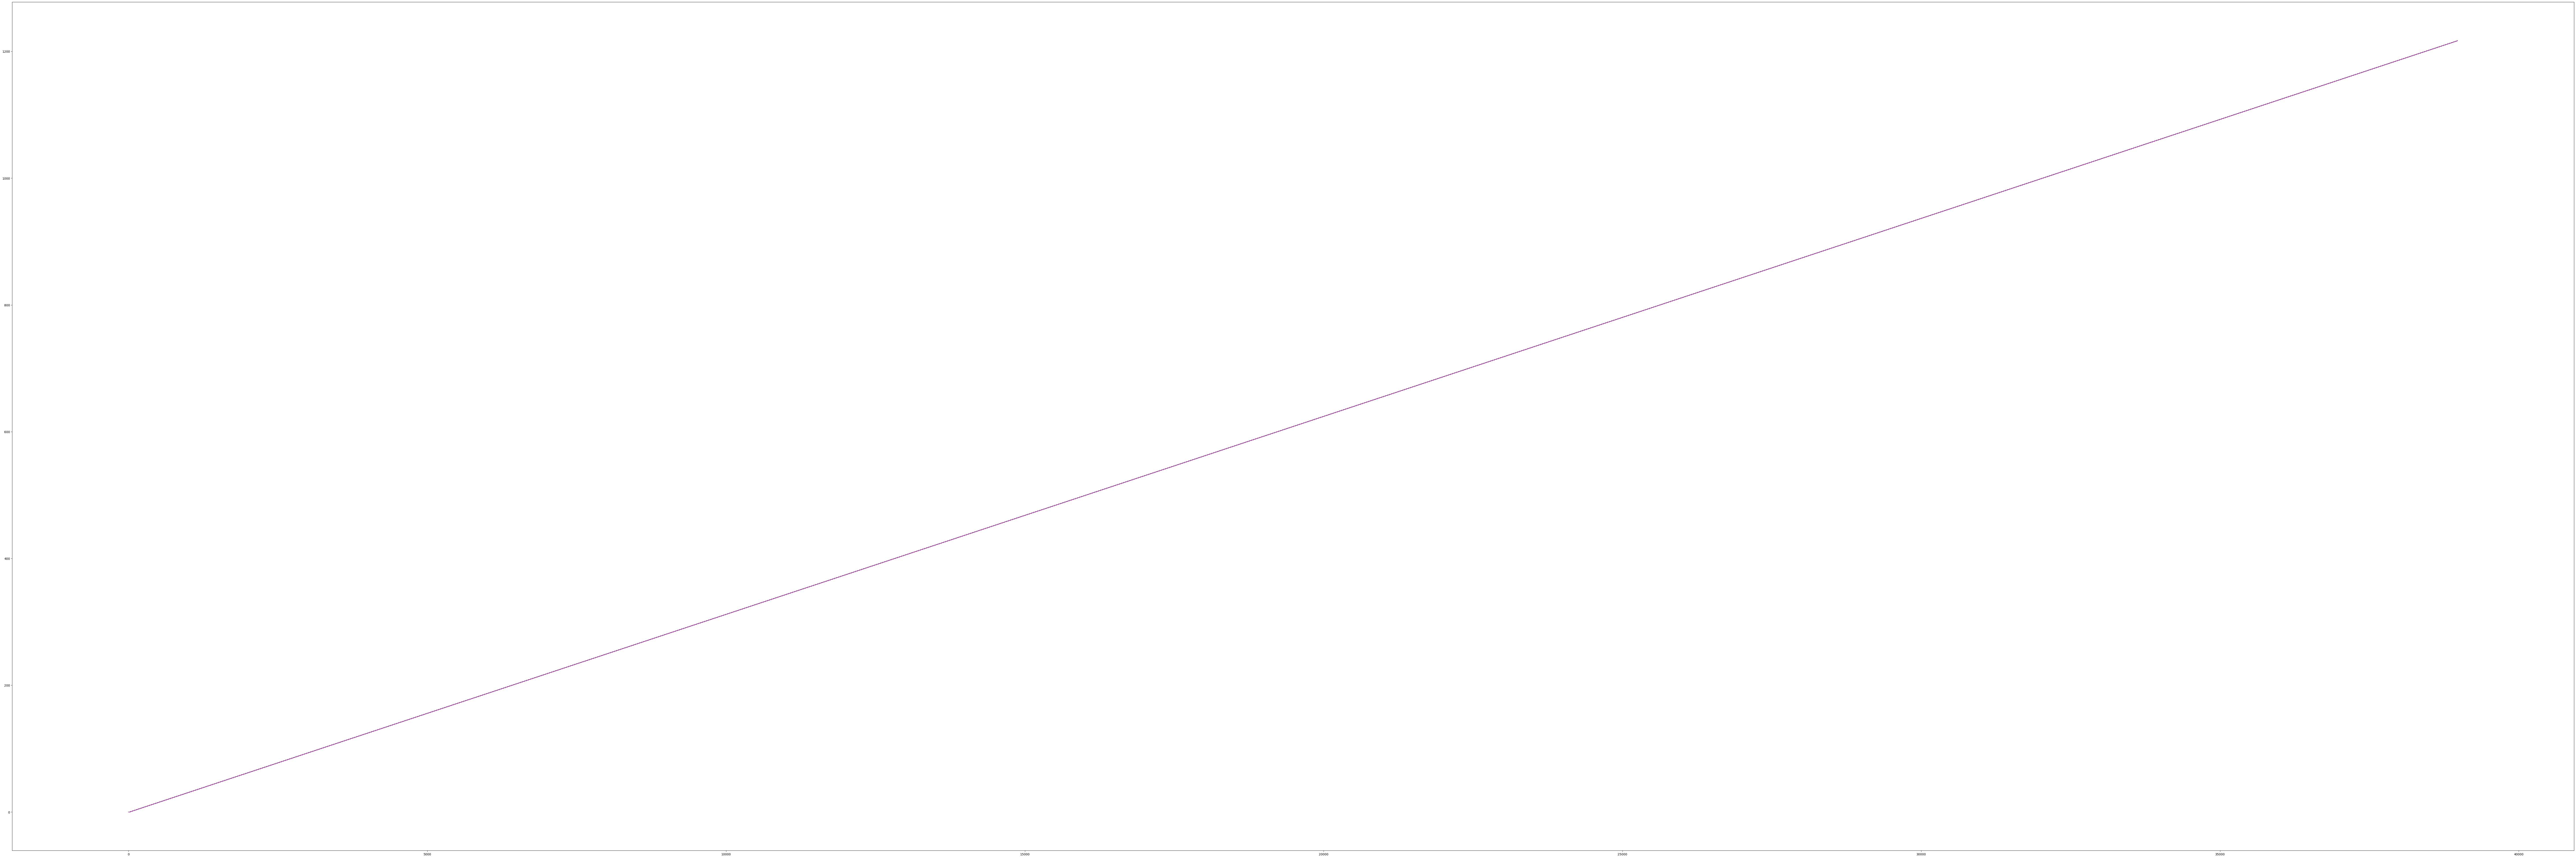

In [ ]:
n = len(signals)

fig = plt.figure(figsize=(150,50))
ax = plt.axes()
for i in np.arange(n):
    ax.plot(signals[i] , color='purple' )
    plt.show()

In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.9 MB/s eta 0:00:00


In [ ]:
import mne

file = "/content/NU0001_EPOCX_191346_2023.08.16T11.49.53+09.00.edf"

data = mne.io.read_raw_edf(file)

raw_data = data.get_data()

# you can get the metadata included in the file and a list of all channels:

info = data.info

channels = data.ch_names

Extracting EDF parameters from /content/NU0001_EPOCX_191346_2023.08.16T11.49.53+09.00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
channels

['TIME_STAMP_s',
 'TIME_STAMP_ms',
 'OR_TIME_STAMP_s',
 'OR_TIME_STAMP_ms',
 'COUNTER',
 'INTERPOLATED',
 'AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'RAW_CQ',
 'BATTERY',
 'BATTERY_PERCENT',
 'MarkerIndex',
 'MarkerType',
 'MarkerValueInt',
 'MARKER_HARDWARE',
 'CQ_AF3',
 'CQ_F7',
 'CQ_F3',
 'CQ_FC5',
 'CQ_T7',
 'CQ_P7',
 'CQ_O1',
 'CQ_O2',
 'CQ_P8',
 'CQ_T8',
 'CQ_FC6',
 'CQ_F4',
 'CQ_F8',
 'CQ_AF4',
 'CQ_Overall',
 'EQ_SampleRateQua',
 'EQ_OVERALL',
 'EQ_AF3',
 'EQ_F7',
 'EQ_F3',
 'EQ_FC5',
 'EQ_T7',
 'EQ_P7',
 'EQ_O1',
 'EQ_O2',
 'EQ_P8',
 'EQ_T8',
 'EQ_FC6',
 'EQ_F4',
 'EQ_F8',
 'EQ_AF4',
 'CQ_CMS',
 'CQ_DRL']

In [ ]:
highlevel.read_edf(trains[10])

(array([[   0.        ,    0.        ,    0.        , ..., 1217.        ,
         1217.        , 1217.        ],
        [   0.        ,   31.2       ,   62.4       , ...,  266.8       ,
          298.1       ,  329.3       ],
        [   0.        ,    0.        ,    0.        , ..., 1217.        ,
         1217.        , 1217.        ],
        ...,
        [ -42.66666667,  -42.5       ,  -42.5       , ...,  -44.33333333,
          -44.16666667,  -44.        ],
        [  11.33333333,   11.5       ,   11.33333333, ...,    7.5       ,
            7.5       ,    7.66666667],
        [  54.16666667,   54.16666667,   54.16666667, ...,   51.66666667,
           51.5       ,   51.5       ]]),
 [{'label': 'TIME_STAMP_s',
   'dimension': 'uV',
   'sample_rate': 32.0,
   'sample_frequency': 32.0,
   'physical_max': 16000.0,
   'physical_min': 0.0,
   'digital_max': 16000,
   'digital_min': 0,
   'prefilter': '',
   'transducer': 'emotiv electrode'},
  {'label': 'TIME_STAMP_ms',
   'dimension

In [ ]:
highlevel.read_edf(trains[0])[0]#[6:13]

array([[   0. ,    0. ,    0. , ..., 1045. , 1045. , 1045. ],
       [   0. ,    7.8,   15.6, ...,  426.4,  434.2,  442. ],
       [   0. ,    0. ,    0. , ..., 1045. , 1045. , 1045. ],
       ...,
       [   0. ,    0. ,    0. , ...,    4. ,    4. ,    4. ],
       [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ],
       [   4. ,    4. ,    4. , ...,    4. ,    4. ,    4. ]])